In [282]:
# 네이버 검색 API 예제 - 블로그 검색
import os
import sys
import urllib.request
import json 
import requests
from bs4 import BeautifulSoup

client_id = "rHHu5Acfznvczw299y6J"
client_secret = "raBCs5llxb"
headers = {
            'X-Naver-Client-Id': client_id,
            'X-Naver-Client-Secret': client_secret
        }
search  = ['기술','technology','it']
url = f"https://openapi.naver.com/v1/search/news?&query={search}&display=100&sort=date" 
# url = f"https://openapi.naver.com/v1/search/news?&query={search}&display=100"
res = requests.get(url, headers=headers)
res.status_code
data = res.json()
item = data['items']

for i in item:
    i['title'] = BeautifulSoup(i['title'],'html.parser').text
    i['description'] = BeautifulSoup(i['description'],'html.parser').text
len(item)

100

In [283]:
df_news = pd.DataFrame(item)
print(f'df shape: {df_news.shape}')
df_news['link'].drop_duplicates(inplace=True)
print(f'df shape: {df_news.shape}')

df shape: (100, 5)
df shape: (100, 5)


In [284]:
from konlpy.tag import Okt
import re

okt = Okt()

df_news['title'] = df_news['title'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))

In [285]:
df_news['pos']=df_news['title'].apply(lambda x: okt.pos(x, stem=True,norm=True))
df_news

,title,originallink,link,description,pubDate,pos
0,COSMAX The Best Indonesian Halal Award The...,http://www.kdfnews.com/news/articleView.html?i...,http://www.kdfnews.com/news/articleView.html?i...,"Min-Kyung Jeong, CEO of COSMAX Indonesia, said...","Wed, 20 Sep 2023 11:40:00 +0900","[(COSMAX, Alpha), (The, Alpha), (Best, Alpha),..."
1,대통령실 윤석열 대통령 유엔연설서 북 러 군사거래 불법 위험성 환기,http://www.breaknews.com/988558,http://www.breaknews.com/988558,윤 대통령은 개발 격차 관련해 재원·기술 역량을 가진 국가 책임·역할을... to ...,"Wed, 20 Sep 2023 11:34:00 +0900","[(대통령실, Noun), (윤석열, Noun), (대통령, Noun), (유엔, ..."
2,윤석열 대통령 카자흐와 정상회담 부산엑스포 지지요청 핵심광물 협력,http://www.breaknews.com/988537,http://www.breaknews.com/988537,"그러면서 ""자원이 풍부한 카자흐스탄과 첨단기술력을 가진 한국이 협력해 원전... c...","Wed, 20 Sep 2023 10:08:00 +0900","[(윤석열, Noun), (대통령, Noun), (카자흐, Noun), (와, Jo..."
3,공공기관 올 상반기 징계 21 8 급증 코레일 한전 LH 톱3 불명예,http://www.breaknews.com/988534,http://www.breaknews.com/988534,이어 △LH 9건 △도로공사 9건 △코레일테크 8건 △기술보증기금 6건... Kor...,"Wed, 20 Sep 2023 09:52:00 +0900","[(공공기관, Noun), (오다, Verb), (상반기, Noun), (징계, N..."
4,윤석열 대통령 우즈벡과 정상회담 부산엑스포 지지요청 공급망 협력논의,http://www.breaknews.com/988533,http://www.breaknews.com/988533,양 정상은 과학기술·방산 분야 협력 확대에도 뜻을 같이했다. *아래는 위 기사를.....,"Wed, 20 Sep 2023 09:44:00 +0900","[(윤석열, Noun), (대통령, Noun), (우즈벡, Noun), (과, Jo..."
...,...,...,...,...,...,...
95,금오공대 경북 최초로 슈퍼컴퓨팅센터 설립한다,http://www.breaknews.com/987784,http://www.breaknews.com/987784,제품개발 및 공정개선 등 컨설팅 지원과 더불어 모델링 및 시뮬레이션 기술을... >...,"Fri, 15 Sep 2023 15:26:00 +0900","[(금오공대, Noun), (경북, Noun), (최초, Noun), (로, Jos..."
96,POSTECH 융합대학원 푸드테크융합전공 개설,http://www.breaknews.com/987772,http://www.breaknews.com/987772,"0시대의 핵심 기술인 스마트팩토리, 빅데이터, 컴퓨터 비전 등 첨단 IT기술과의.....","Fri, 15 Sep 2023 15:26:00 +0900","[(POSTECH, Alpha), (융합, Noun), (대학원, Noun), (푸..."
97,대구시 이탈리아 자매결연도시 밀라노 방문 경제교류 확대 추진,http://www.breaknews.com/987800,http://www.breaknews.com/987800,제조기술 등을 시찰하고 지역 섬유패션 R&D 및 기술 개발 분야에서 협력 방안을.....,"Fri, 15 Sep 2023 15:24:00 +0900","[(대구시, Noun), (이탈리아, Noun), (자매결연도시, Noun), (밀..."
98,포스코 챗GPT 도입으로 비즈니스 디지털 혁신 가속화,http://www.breaknews.com/987794,http://www.breaknews.com/987794,혁신적인 IT기술을 업무에 접목시키는 노력을 이어나가며 디지털 트랜스포메이션... ...,"Fri, 15 Sep 2023 15:24:00 +0900","[(포스코, Noun), (챗, Noun), (GPT, Alpha), (도입, No..."


In [286]:
df_news['noun'] = df_news['pos'].apply(lambda x: [ex[0] for ex in x if ex[1] == 'Noun' or ex[1]=='Alpha'])
df_news

,title,originallink,link,description,pubDate,pos,noun
0,COSMAX The Best Indonesian Halal Award The...,http://www.kdfnews.com/news/articleView.html?i...,http://www.kdfnews.com/news/articleView.html?i...,"Min-Kyung Jeong, CEO of COSMAX Indonesia, said...","Wed, 20 Sep 2023 11:40:00 +0900","[(COSMAX, Alpha), (The, Alpha), (Best, Alpha),...","[COSMAX, The, Best, Indonesian, Halal, Award, ..."
1,대통령실 윤석열 대통령 유엔연설서 북 러 군사거래 불법 위험성 환기,http://www.breaknews.com/988558,http://www.breaknews.com/988558,윤 대통령은 개발 격차 관련해 재원·기술 역량을 가진 국가 책임·역할을... to ...,"Wed, 20 Sep 2023 11:34:00 +0900","[(대통령실, Noun), (윤석열, Noun), (대통령, Noun), (유엔, ...","[대통령실, 윤석열, 대통령, 유엔, 연설, 북, 군사, 거래, 불법, 위험성, 환기]"
2,윤석열 대통령 카자흐와 정상회담 부산엑스포 지지요청 핵심광물 협력,http://www.breaknews.com/988537,http://www.breaknews.com/988537,"그러면서 ""자원이 풍부한 카자흐스탄과 첨단기술력을 가진 한국이 협력해 원전... c...","Wed, 20 Sep 2023 10:08:00 +0900","[(윤석열, Noun), (대통령, Noun), (카자흐, Noun), (와, Jo...","[윤석열, 대통령, 카자흐, 정상회담, 부산, 엑스포, 지지, 요청, 핵심, 광물,..."
3,공공기관 올 상반기 징계 21 8 급증 코레일 한전 LH 톱3 불명예,http://www.breaknews.com/988534,http://www.breaknews.com/988534,이어 △LH 9건 △도로공사 9건 △코레일테크 8건 △기술보증기금 6건... Kor...,"Wed, 20 Sep 2023 09:52:00 +0900","[(공공기관, Noun), (오다, Verb), (상반기, Noun), (징계, N...","[공공기관, 상반기, 징계, 급증, 코레일, 한전, LH, 톱, 불명예]"
4,윤석열 대통령 우즈벡과 정상회담 부산엑스포 지지요청 공급망 협력논의,http://www.breaknews.com/988533,http://www.breaknews.com/988533,양 정상은 과학기술·방산 분야 협력 확대에도 뜻을 같이했다. *아래는 위 기사를.....,"Wed, 20 Sep 2023 09:44:00 +0900","[(윤석열, Noun), (대통령, Noun), (우즈벡, Noun), (과, Jo...","[윤석열, 대통령, 우즈벡, 정상회담, 부산, 엑스포, 지지, 요청, 공급망, 협력..."
...,...,...,...,...,...,...,...
95,금오공대 경북 최초로 슈퍼컴퓨팅센터 설립한다,http://www.breaknews.com/987784,http://www.breaknews.com/987784,제품개발 및 공정개선 등 컨설팅 지원과 더불어 모델링 및 시뮬레이션 기술을... >...,"Fri, 15 Sep 2023 15:26:00 +0900","[(금오공대, Noun), (경북, Noun), (최초, Noun), (로, Jos...","[금오공대, 경북, 최초, 슈퍼, 컴퓨팅, 센터, 설립]"
96,POSTECH 융합대학원 푸드테크융합전공 개설,http://www.breaknews.com/987772,http://www.breaknews.com/987772,"0시대의 핵심 기술인 스마트팩토리, 빅데이터, 컴퓨터 비전 등 첨단 IT기술과의.....","Fri, 15 Sep 2023 15:26:00 +0900","[(POSTECH, Alpha), (융합, Noun), (대학원, Noun), (푸...","[POSTECH, 융합, 대학원, 푸드, 테크, 융합, 전공, 개설]"
97,대구시 이탈리아 자매결연도시 밀라노 방문 경제교류 확대 추진,http://www.breaknews.com/987800,http://www.breaknews.com/987800,제조기술 등을 시찰하고 지역 섬유패션 R&D 및 기술 개발 분야에서 협력 방안을.....,"Fri, 15 Sep 2023 15:24:00 +0900","[(대구시, Noun), (이탈리아, Noun), (자매결연도시, Noun), (밀...","[대구시, 이탈리아, 자매결연도시, 밀라노, 방문, 경제, 교류, 확대, 추진]"
98,포스코 챗GPT 도입으로 비즈니스 디지털 혁신 가속화,http://www.breaknews.com/987794,http://www.breaknews.com/987794,혁신적인 IT기술을 업무에 접목시키는 노력을 이어나가며 디지털 트랜스포메이션... ...,"Fri, 15 Sep 2023 15:24:00 +0900","[(포스코, Noun), (챗, Noun), (GPT, Alpha), (도입, No...","[포스코, 챗, GPT, 도입, 비즈니스, 디지털, 혁신, 가속]"


In [287]:
result_string = ' '.join(df_news['noun'].apply(lambda x: ' '.join(x)))
result_string

'COSMAX The Best Indonesian Halal Award The First Korean Cosmetic Com 대통령실 윤석열 대통령 유엔 연설 북 군사 거래 불법 위험성 환기 윤석열 대통령 카자흐 정상회담 부산 엑스포 지지 요청 핵심 광물 협력 공공기관 상반기 징계 급증 코레일 한전 LH 톱 불명예 윤석열 대통령 우즈벡 정상회담 부산 엑스포 지지 요청 공급망 협력 논의 경북 글로벌 메타 버스 허브 도약 위 신규 사업 추진 전사 직원 위 HR 및 업무 지원 솔루션 접근 중국 러시아 군사 공동체 한반도 또 다른 화약고 두산 디지털 이노베이션 아시아 최대 규모 보안 콘퍼런스 참가 충북 테크노 파크 베트남 수출 Biz 플랫폼 홍보 부스 시연 박영순 국회의원 대통령 R D 카르텔 한마디 현장 아비규환 논산시 태국 방콕 농 식품 박람회 준비 전시 운동경기 부 개 팀 창단 서산시 내년 시민 중심 시책 개 분야 개 정책 발굴 아산시 혁신 시책 구상 보고 회 개최 윤석열 대통령 수리남 대통령 수리남 산림 조사 복원 기여 윤석열 대통령 코트디부아르 부통령 접견 K 라이스벨트 참여 환영 두산 디지털 이노베이션 아시아 최대 규모 보안 콘퍼런스 참가 산업 이슈 두산 디지털 이노베이션 아시아 최대 규모 보안 콘퍼런스 참가 충북 교육청 청주 지역 교 원 감 에듀 테크 역량 강화 워크숍 전남도 안정 어촌 정착 전남 귀어 학교 기 개강 LG Electronics Transforming Into a Media and Entertainment Company 카 미스 알 샤 마키 차관 홍남표 창원 특례시 적극 협력 요청 순천 그린 광장 멀티미디어 불꽃 쇼 한화 세계 최고 연출 만발 한국 노총 ILO 부산 세계박람회 유치 지지 요청 식품 산업 내 사회 과제 해결 키 푸드 테크 대한 일본 관심 두산 디지털 이노베이션 ISEC 사이버 보안 솔루션 두산 디지털 이노베이션 ISEC 참가 IT OT 보안 솔루션 두산 디지털 이노베이션 아시아 최대 규모 보안 콘퍼런스 참가 두산 디지털 이노베

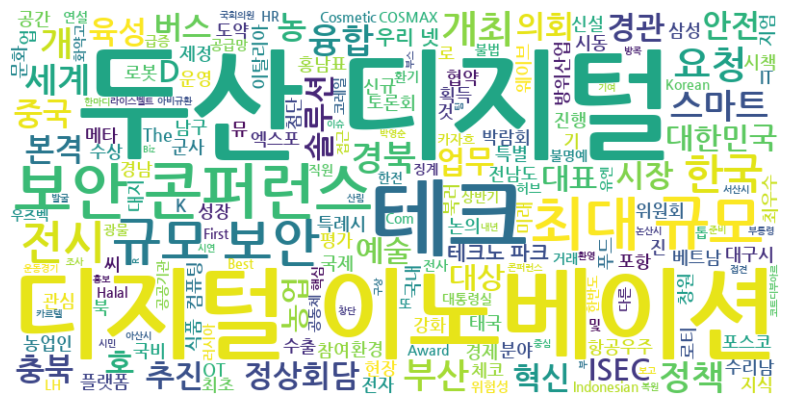

In [294]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

stop_words = ['기술','개발','인재','확보','탈취','곳','그룹','대통령','협력','지원','배','이상','산업','글로벌','제','날','위','각','선봬','김동철','윤석열','아시아','지지','대학',
              '참가','기업','센터','사업','회']
# 한글 폰트 설정
font_path = 'C:/Users/TEMP/AppData/Local/Microsoft/Windows/Fonts/NanumGothicBold.ttf'
plt.rcParams['font.family'] = 'NanumGothic'  # 나눔 고딕 폰트를 예시로 설정
wordcloud = WordCloud(font_path=font_path,width=800, height=400, background_color='white',
                      stopwords=stop_words).generate(result_string)

# Word Cloud 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [295]:
from collections import Counter

word_freq = Counter(result_string.split()).most_common()
lst = [i for i in word_freq if i[0] not in stop_words]
keyword_lst = [keyword[0] for keyword in lst[:10]]
keyword_lst

['디지털', '두산', '이노베이션', '보안', '콘퍼런스', '규모', '테크', '최대', '전시', '한국']

In [296]:
filtered_df = df_news[df_news['noun'].apply(lambda x: any(k in x for k in keyword_lst))]
filtered_df.shape

(38, 7)

In [297]:
filtered_df

,title,originallink,link,description,pubDate,pos,noun
8,두산디지털이노베이션 아시아 최대 규모 보안 콘퍼런스 참가,http://www.wsobi.com/news/articleView.html?idx...,http://www.wsobi.com/news/articleView.html?idx...,"이번 콘퍼런스에서 DDI는 사이버 보안 파트너사인 사이버리즌, 클래로티와 공동으로 ...","Wed, 20 Sep 2023 08:26:00 +0900","[(두산, Noun), (디지털, Noun), (이노베이션, Noun), (아시아,...","[두산, 디지털, 이노베이션, 아시아, 최대, 규모, 보안, 콘퍼런스, 참가]"
12,대전시 운동경기부 11개 팀 창단,http://www.breaknews.com/988469,http://www.breaknews.com/988469,Daejeon City announced that it held a business...,"Wed, 20 Sep 2023 08:04:00 +0900","[(대, Modifier), (전시, Noun), (운동경기, Noun), (부, ...","[전시, 운동경기, 부, 개, 팀, 창단]"
17,두산디지털이노베이션 아시아 최대 규모 보안 콘퍼런스 참가,http://www.getnews.co.kr/news/articleView.html...,http://www.getnews.co.kr/news/articleView.html...,"이번 콘퍼런스에서 DDI는 사이버 보안 파트너사인 사이버리즌, 클래로티와 공동으로 ...","Wed, 20 Sep 2023 07:34:00 +0900","[(두산, Noun), (디지털, Noun), (이노베이션, Noun), (아시아,...","[두산, 디지털, 이노베이션, 아시아, 최대, 규모, 보안, 콘퍼런스, 참가]"
18,산업 이슈 두산디지털이노베이션 아시아 최대 규모 보안 콘퍼런스 참가 外,http://www.lawissue.co.kr/view.php?ud=20230919...,http://www.lawissue.co.kr/view.php?ud=20230919...,"이번 콘퍼런스에서 DDI는 사이버 보안 파트너사인 사이버리즌, 클래로티와 공동으로 ...","Tue, 19 Sep 2023 20:36:00 +0900","[(산업, Noun), (이슈, Noun), (두산, Noun), (디지털, Nou...","[산업, 이슈, 두산, 디지털, 이노베이션, 아시아, 최대, 규모, 보안, 콘퍼런스..."
19,충북교육청 청주지역 교 원 감 에듀테크 역량강화 워크숍,http://www.breaknews.com/988431,http://www.breaknews.com/988431,인공지능 기술이 포함된 AI 기반 코스웨어(학습자 진단 및 수준별 학습 콘텐츠를.....,"Tue, 19 Sep 2023 20:06:00 +0900","[(충북, Noun), (교육청, Noun), (청주, Noun), (지역, Nou...","[충북, 교육청, 청주, 지역, 교, 원, 감, 에듀, 테크, 역량, 강화, 워크숍]"
24,한국노총 ILO에 2030부산세계박람회 유치 지지 요청,http://www.breaknews.com/988401,http://www.breaknews.com/988401,"정보통신기술(ICT), 글로벌 비즈니스 환경 우수 도시 등과 함께 ▲국제노동기구.....","Tue, 19 Sep 2023 17:58:00 +0900","[(한국, Noun), (노총, Noun), (ILO, Alpha), (에, Jos...","[한국, 노총, ILO, 부산, 세계박람회, 유치, 지지, 요청]"
25,식품산업 내 사회 과제를 해결할 키 푸드테크 에 대한 일본 관심,http://dream.kotra.or.kr/kotranews/cms/news/ac...,http://dream.kotra.or.kr/kotranews/cms/news/ac...,푸드테크란 'Food'와 'Technology'를 조합한 말로 최신 기술을 활용해 ...,"Tue, 19 Sep 2023 17:36:00 +0900","[(식품, Noun), (산업, Noun), (내, Noun), (사회, Noun)...","[식품, 산업, 내, 사회, 과제, 해결, 키, 푸드, 테크, 대한, 일본, 관심]"
26,두산디지털이노베이션 ISEC서 사이버보안 솔루션 선보여,https://www.ebn.co.kr/news/view/1593095/?sc=Naver,https://www.ebn.co.kr/news/view/1593095/?sc=Naver,"이번 콘퍼런스에서 DDI는 사이버 보안 파트너사인 사이버리즌, 클래로티와 공동으로 ...","Tue, 19 Sep 2023 17:24:00 +0900","[(두산, Noun), (디지털, Noun), (이노베이션, Noun), (ISEC...","[두산, 디지털, 이노베이션, ISEC, 사이버, 보안, 솔루션]"
27,두산디지털이노베이션 ISEC 2023 참가해 IT OT 보안 솔루션 선보여,http://www.mtnews.net/news/view.php?idx=16990,http://www.mtnews.net/news/view.php?idx=16990,"이번 콘퍼런스에서 DDI는 사이버 보안 파트너사인 사이버리즌, 클래로티와 공동으로 ...","Tue, 19 Sep 2023 16:56:00 +0900","[(두산, Noun), (디지털, Noun), (이노베이션, Noun), (ISEC...","[두산, 디지털, 이노베이션, ISEC, 참가, IT, OT, 보안, 솔루션]"
28,두산디지털이노베이션 아시아 최대 규모 보안 콘퍼런스 참가,http://www.fntimes.com/html/view.php?ud=202309...,http://www.fntimes.com/html/view.php?ud=202309...,"이번 콘퍼런스에서 DDI는 사이버 보안 파트너사인 사이버리즌, 클래로티와 공동으로 ...","Tue, 19 Sep 2023 16:24:00 +0900","[(두산, Noun), (디지털, Noun), (이노베이션, Noun), (아시아,...","[두산, 디지털, 이노베이션, 아시아, 최대, 규모, 보안, 콘퍼런스, 참가]"


In [298]:
for key in keyword_lst:
    for col in filtered_df['noun']:
        print(col)
        # if key in filtered_df['noun']:
        #     print(str('df_'+key))
    

['두산', '디지털', '이노베이션', '아시아', '최대', '규모', '보안', '콘퍼런스', '참가']
['전시', '운동경기', '부', '개', '팀', '창단']
['두산', '디지털', '이노베이션', '아시아', '최대', '규모', '보안', '콘퍼런스', '참가']
['산업', '이슈', '두산', '디지털', '이노베이션', '아시아', '최대', '규모', '보안', '콘퍼런스', '참가']
['충북', '교육청', '청주', '지역', '교', '원', '감', '에듀', '테크', '역량', '강화', '워크숍']
['한국', '노총', 'ILO', '부산', '세계박람회', '유치', '지지', '요청']
['식품', '산업', '내', '사회', '과제', '해결', '키', '푸드', '테크', '대한', '일본', '관심']
['두산', '디지털', '이노베이션', 'ISEC', '사이버', '보안', '솔루션']
['두산', '디지털', '이노베이션', 'ISEC', '참가', 'IT', 'OT', '보안', '솔루션']
['두산', '디지털', '이노베이션', '아시아', '최대', '규모', '보안', '콘퍼런스', '참가']
['두산', '디지털', '이노베이션', '아시아', '최대', '규모', '보안', '콘퍼런스', '참가']
['두산', '디지털', '이노베이션', '아시아', '최대', '규모', '보안', '콘퍼런스', '참가']
['두산', '디지털', '이노베이션', '최대', '규모', '보안', '콘퍼런스', '참가']
['두산', '디지털', '이노베이션', '아시아', '최대', '규모', '보안', '콘퍼런스', '참가']
['두산', '디지털', '이노베이션', '국제', '시큐리티', '콘퍼런스', '참가']
['두산', '디지털', '이노베이션', '국제', '보안', '콘퍼런스', '참가']
['두산', '디지털', '이노베이션', '최대', '규모', '보안', '콘퍼런스', '참가']